In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:

try:
    df = pd.read_csv('housing.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'housing.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'housing.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: 'housing.csv' parsing error.")
    df = None

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


(20640, 10)


# Data Exploration

Explore the housing dataset to understand its characteristics.

Examine the data types, missing values, distributions, relationships, and correlations as instructed. Generate visualizations to support the analysis.

Data Types:
 longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Missing Values:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Missing Value Percentage:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


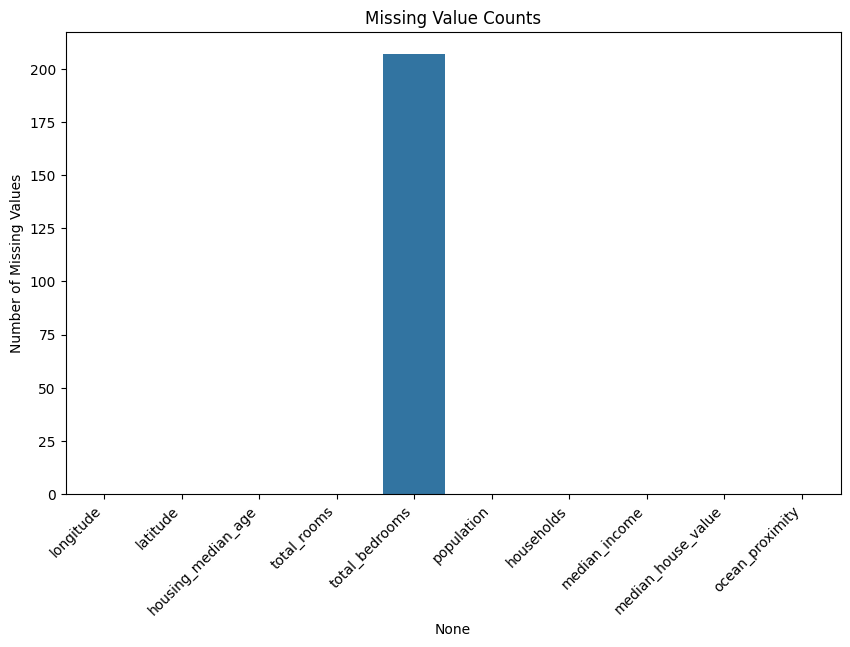

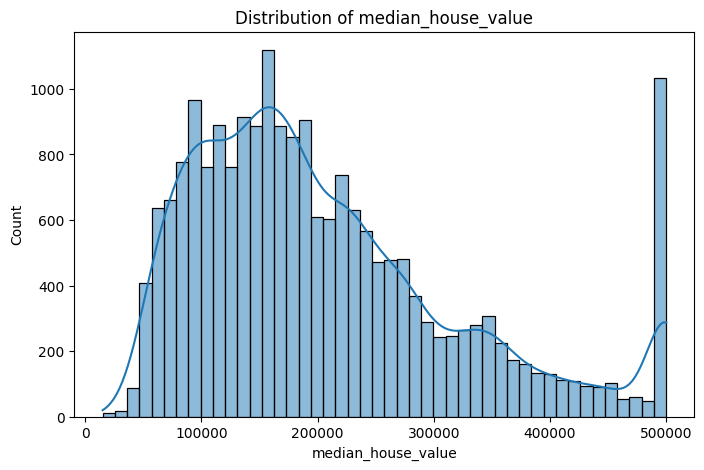

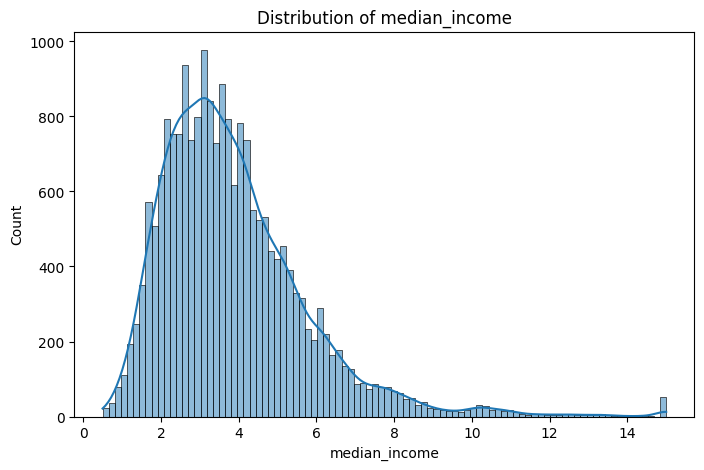

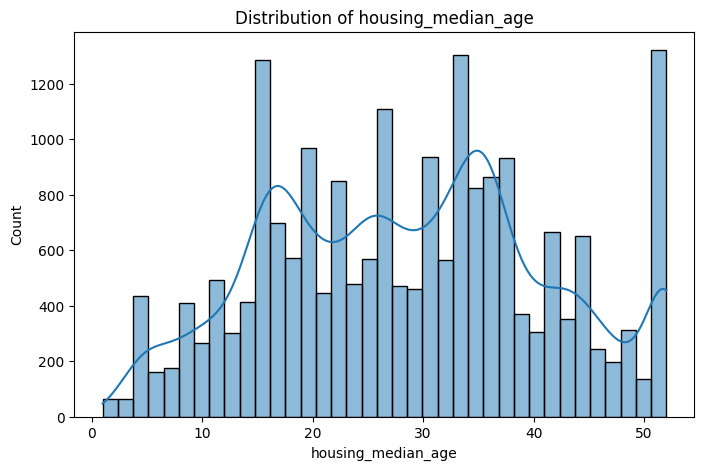

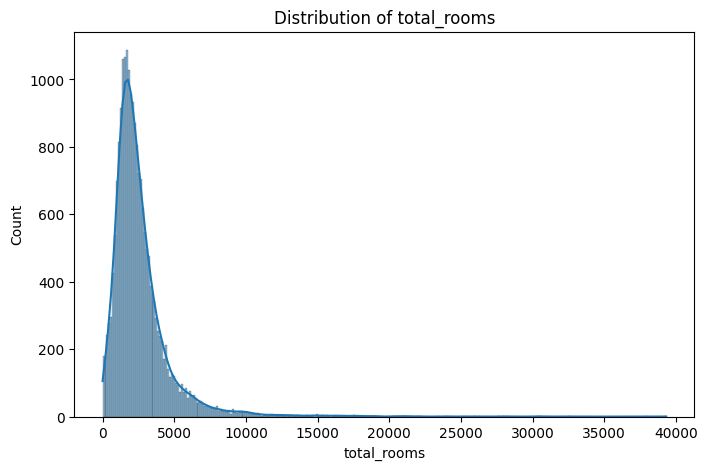

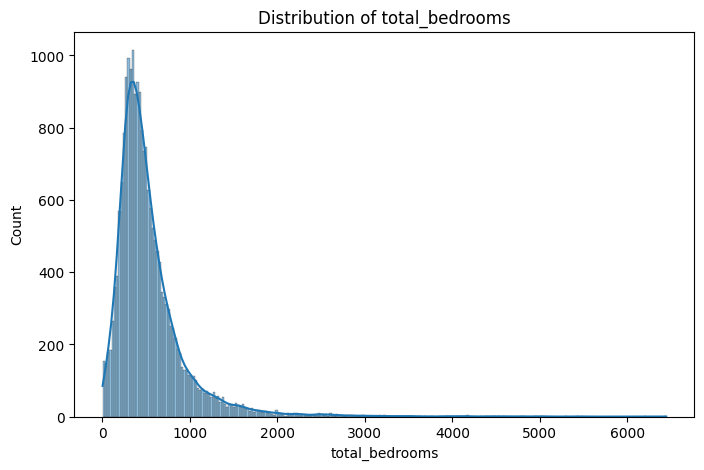

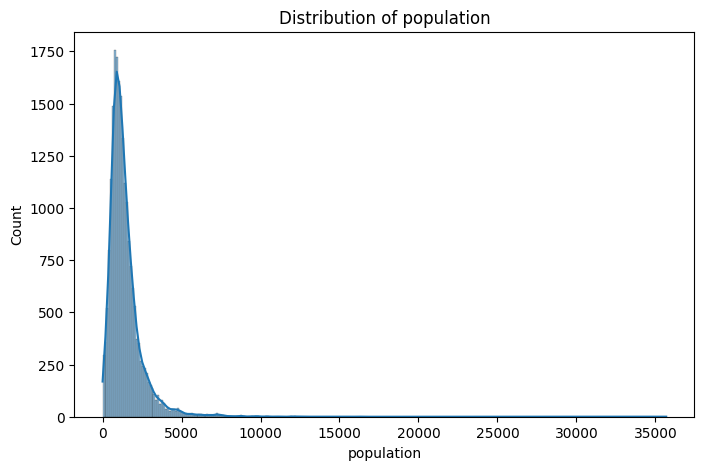

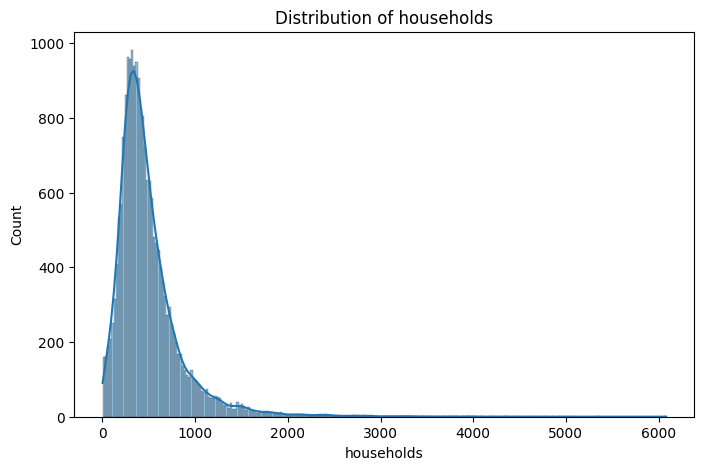

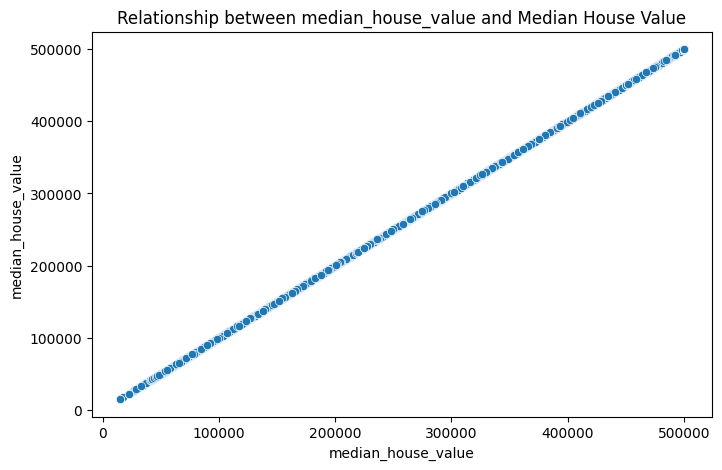

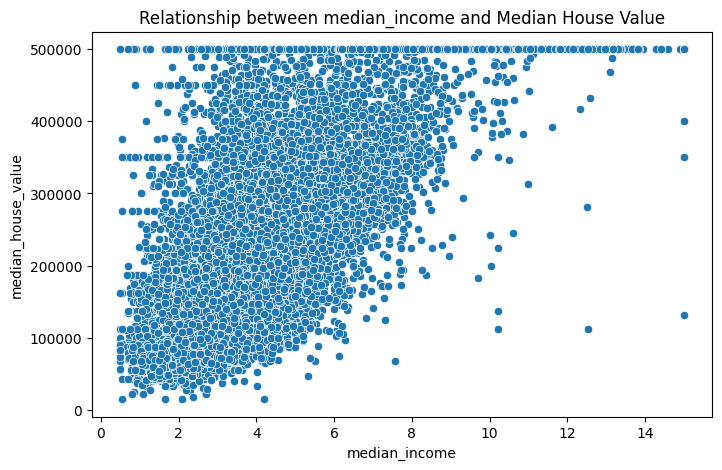

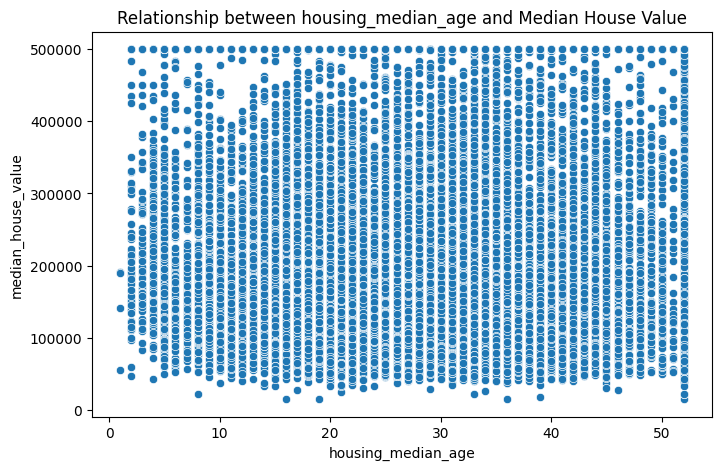

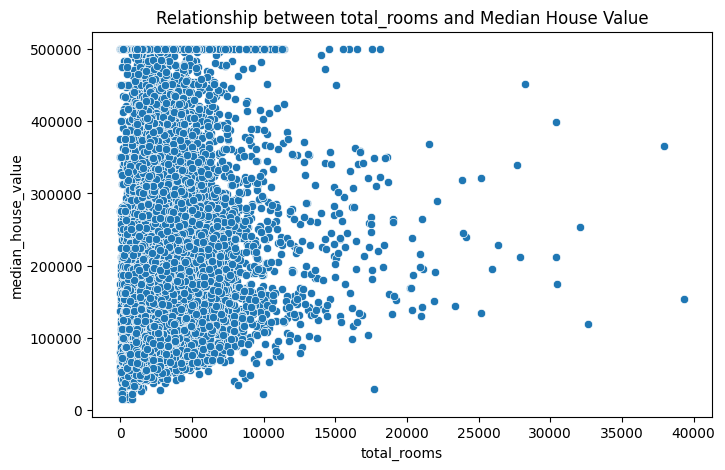

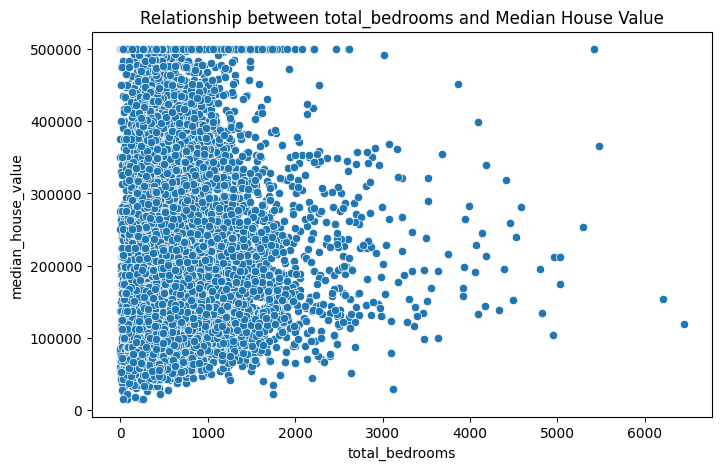

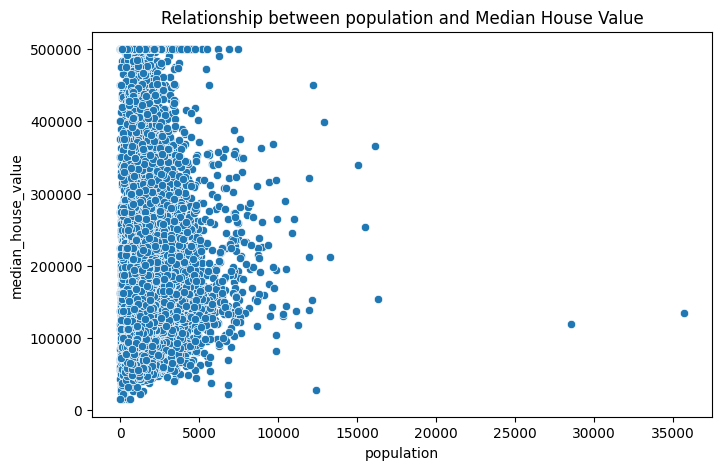

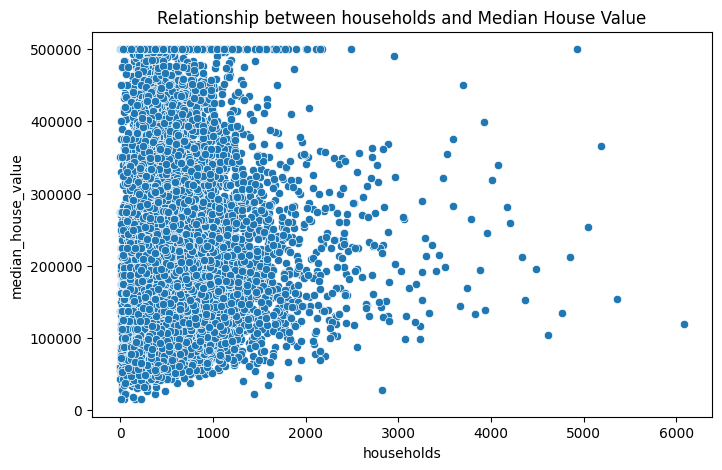


Unique Values and Frequencies for Categorical Features:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


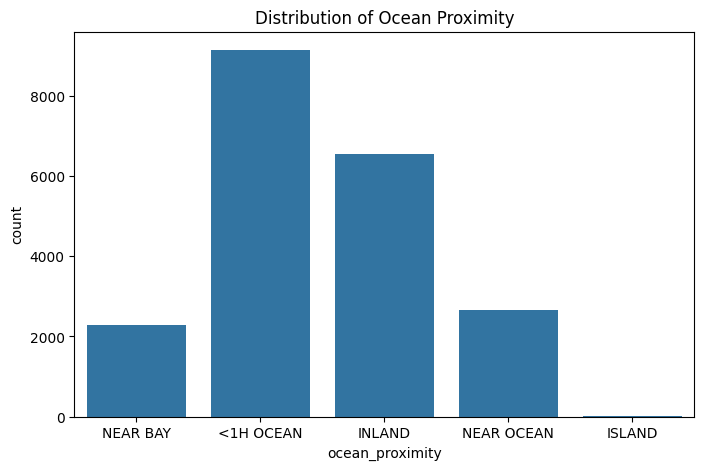

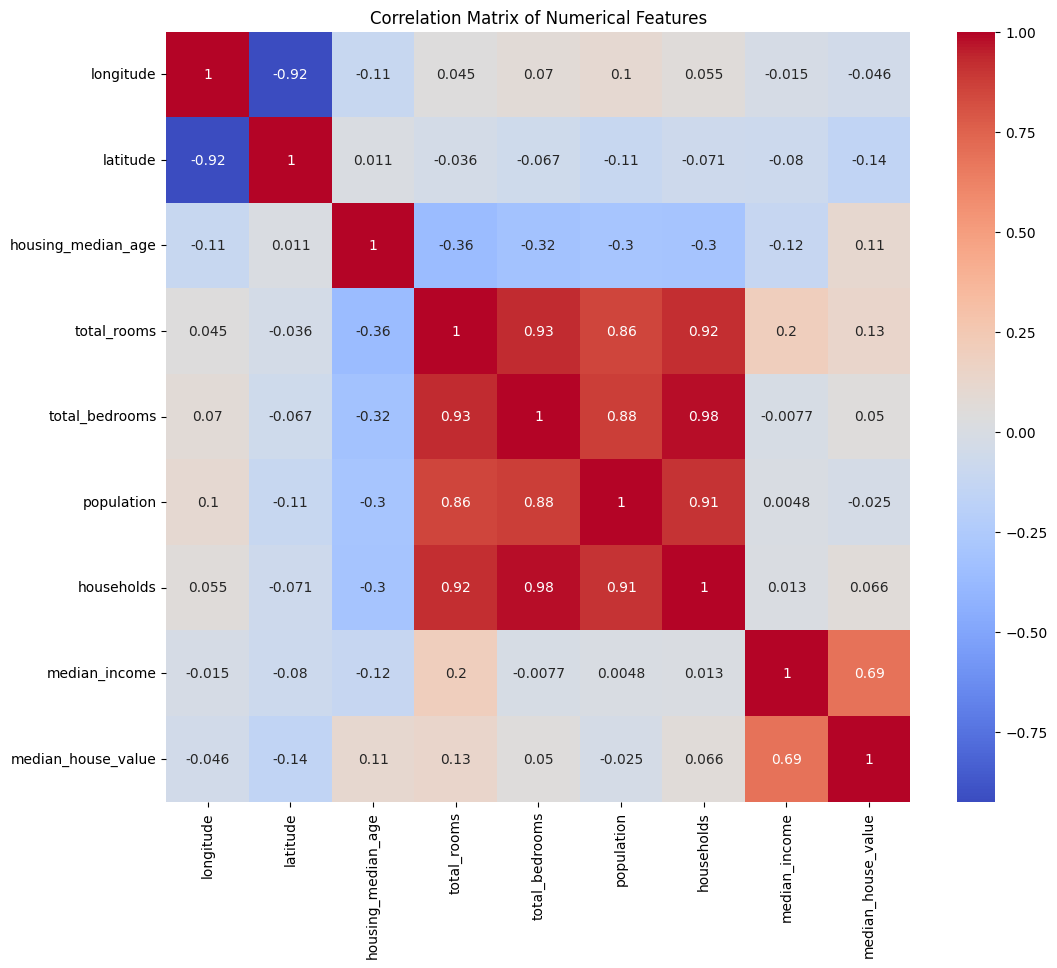

In [4]:
# 1. Data Types and Type Conversion
print("Data Types:\n", df.dtypes)

# 2. Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=45, ha='right')
plt.title('Missing Value Counts')
plt.ylabel('Number of Missing Values')
plt.show()

# 3. Distribution of Numerical Features
numerical_features = ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# 4. Relationship between Numerical Features and Target Variable
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=feature, y='median_house_value', data=df)
    plt.title(f'Relationship between {feature} and Median House Value')
    plt.show()

# 5. Categorical Features
print("\nUnique Values and Frequencies for Categorical Features:")
print(df['ocean_proximity'].value_counts())
plt.figure(figsize=(8, 5))
sns.countplot(x='ocean_proximity', data=df)
plt.title('Distribution of Ocean Proximity')
plt.show()

# 6. Correlation Matrix (Corrected)
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [5]:
# 7. Summary Report
print("""
## Exploratory Data Analysis (EDA) Summary

**Data Types:**

The dataset contains a mix of numerical and categorical features.  'ocean_proximity' is categorical.  All other features are numerical.

**Missing Values:**

The 'total_bedrooms' column has 207 missing values (approximately 1%).  A bar chart visualizing the missing value counts is displayed above.

**Distribution of Numerical Features:**

Histograms and density plots for key numerical features (median_house_value, median_income, housing_median_age, total_rooms, total_bedrooms, population, households) were generated and displayed.  These plots reveal the distribution of each feature and potential outliers.  The target variable, 'median_house_value', appears to have a right-skewed distribution.

**Relationship between Numerical Features and Target Variable:**

Scatter plots were generated to visualize the relationship between each numerical feature and the target variable ('median_house_value'). These plots help identify potential linear or non-linear relationships and the presence of outliers.

**Categorical Features:**

The 'ocean_proximity' feature has five unique categories: <1H OCEAN, INLAND, NEAR OCEAN, NEAR BAY, and ISLAND.  A bar chart visualizing the frequency of each category is displayed above.

**Correlation Matrix:**

A heatmap of the correlation matrix for numerical features is displayed above. This helps identify strong positive or negative correlations between features and the target variable.


**Next Steps:**

Based on the EDA, the following steps are recommended:

1. Address the missing values in 'total_bedrooms'.  Possible strategies include imputation or removal.
2. Consider transformations for skewed features such as 'median_house_value' to improve model performance.  Logarithmic transformation is a potential solution.
3. Explore feature engineering to create new features that might capture more complex relationships in the data.  For example, create new features by combining existing ones.
4. Investigate and handle outliers in numerical features, particularly in the target variable.
""")


## Exploratory Data Analysis (EDA) Summary

**Data Types:**

The dataset contains a mix of numerical and categorical features.  'ocean_proximity' is categorical.  All other features are numerical.

**Missing Values:**

The 'total_bedrooms' column has 207 missing values (approximately 1%).  A bar chart visualizing the missing value counts is displayed above.

**Distribution of Numerical Features:**

Histograms and density plots for key numerical features (median_house_value, median_income, housing_median_age, total_rooms, total_bedrooms, population, households) were generated and displayed.  These plots reveal the distribution of each feature and potential outliers.  The target variable, 'median_house_value', appears to have a right-skewed distribution.

**Relationship between Numerical Features and Target Variable:**

Scatter plots were generated to visualize the relationship between each numerical feature and the target variable ('median_house_value'). These plots help identify poten

# Data Cleaning

Clean the housing dataset by handling missing values and outliers.

Fill missing values in 'total_bedrooms' with the median, identify and handle outliers in numerical features (especially 'median_house_value'), and then verify the cleaning process with visualizations.

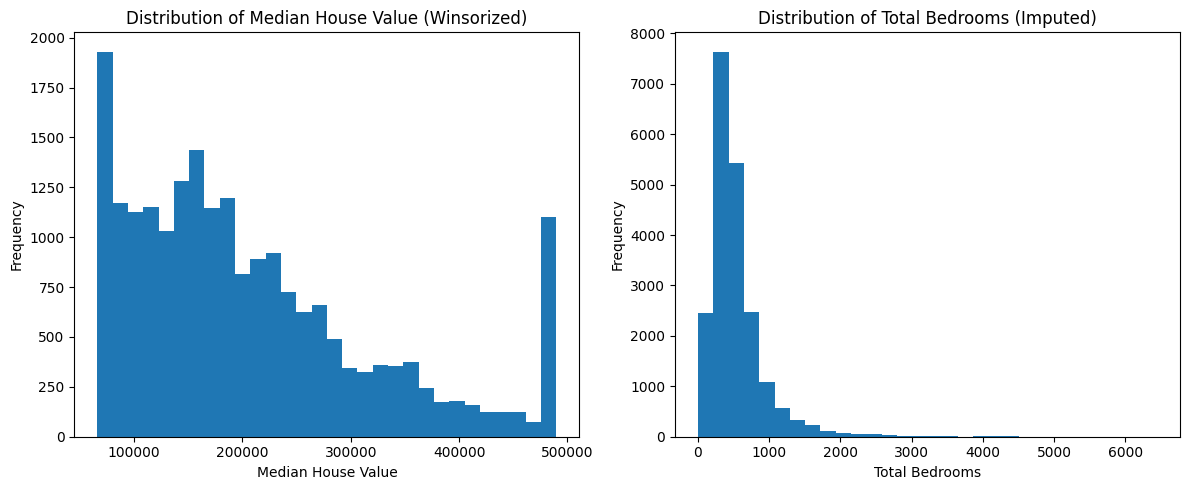

In [7]:
# Fill missing values in 'total_bedrooms' with the median
median_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(median_bedrooms)

# Winsorize 'median_house_value'
from scipy.stats.mstats import winsorize
df['median_house_value'] = winsorize(df['median_house_value'], limits=[0.05, 0.05])

# Create a copy of the cleaned DataFrame
df_cleaned = df.copy()

# Visualize the distributions of 'median_house_value' and 'total_bedrooms' after cleaning
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_cleaned['median_house_value'], bins=30)
plt.title('Distribution of Median House Value (Winsorized)')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_cleaned['total_bedrooms'], bins=30)
plt.title('Distribution of Total Bedrooms (Imputed)')
plt.xlabel('Total Bedrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature Engineering

Engineer new features from the cleaned dataset.

Engineer new features as requested, including ratios, log transformations, and interactions, and then encode the categorical feature 'ocean_proximity' using one-hot encoding. Finally, combine all features into a new DataFrame 'df_engineered' and display the first few rows.

In [8]:

# Create new features
df_engineered = df_cleaned.copy()
df_engineered['rooms_per_household'] = df_engineered['total_rooms'] / df_engineered['households']
df_engineered['bedrooms_per_room'] = df_engineered['total_bedrooms'] / df_engineered['total_rooms']
df_engineered['population_per_household'] = df_engineered['population'] / df_engineered['households']

# Apply log transformations to skewed features
df_engineered['median_house_value_log'] = np.log1p(df_engineered['median_house_value'])
df_engineered['median_income_log'] = np.log1p(df_engineered['median_income'])

# Explore interactions
df_engineered['income_rooms_interaction'] = df_engineered['median_income'] * df_engineered['rooms_per_household']

# One-hot encode 'ocean_proximity'
df_engineered = pd.get_dummies(df_engineered, columns=['ocean_proximity'], drop_first=False)

# Display the first few rows of the engineered DataFrame
display(df_engineered.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value_log,median_income_log,income_rooms_interaction,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,13.022766,2.232720,58.144254,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,12.789687,2.230165,51.785271,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,12.771673,2.111110,60.150315,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,12.740520,1.893579,32.827897,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,12.743154,1.578195,24.161264,False,False,False,True,False


# Data Visualization

Visualize key features and their relationships with the target variable (median house value) in the engineered dataset.

Visualize the distribution of the target variable and its relationship with key features using histograms, scatter plots, and boxplots.

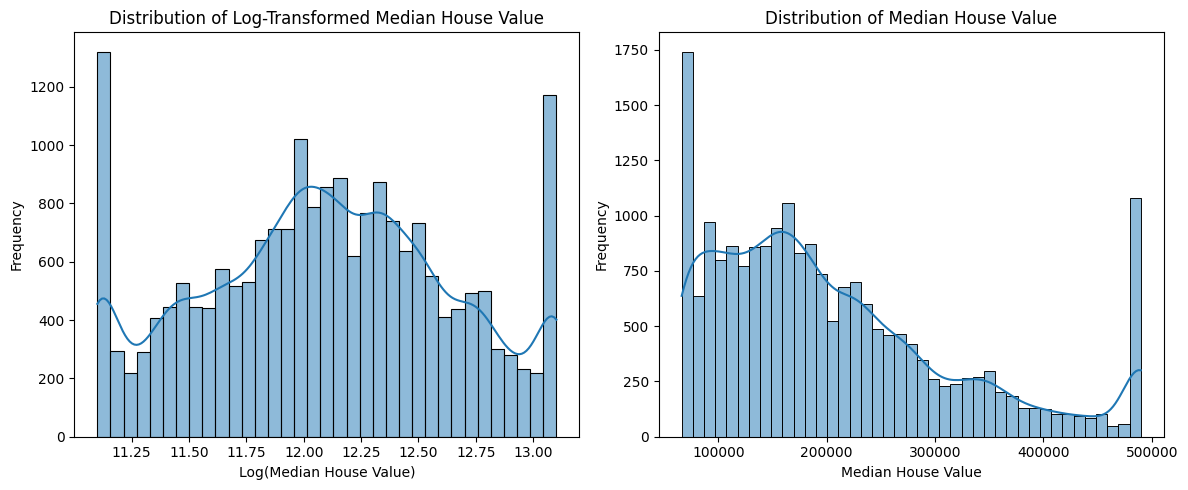

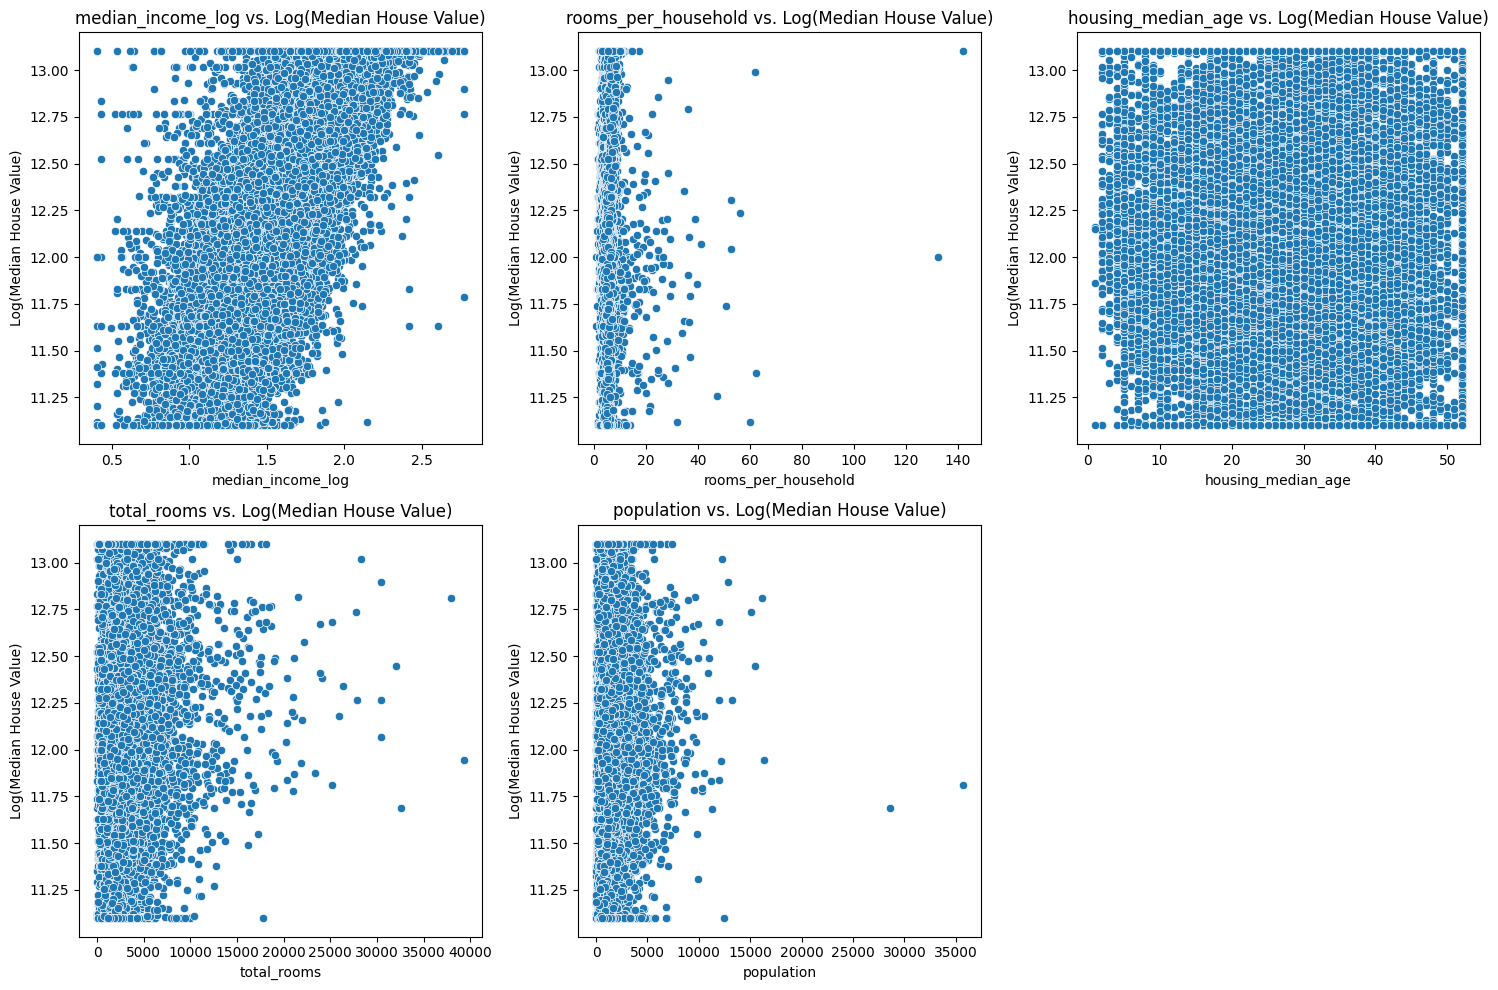

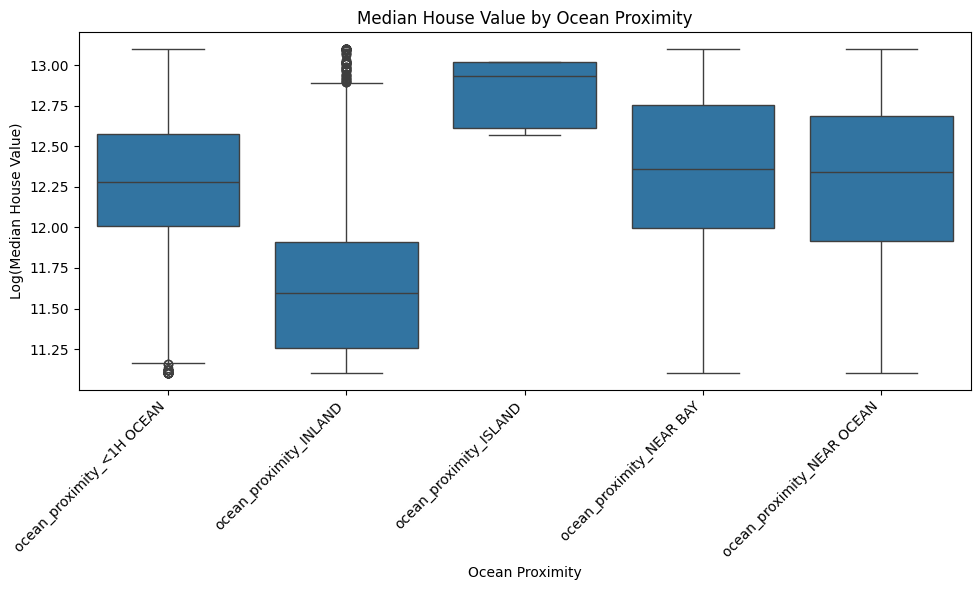

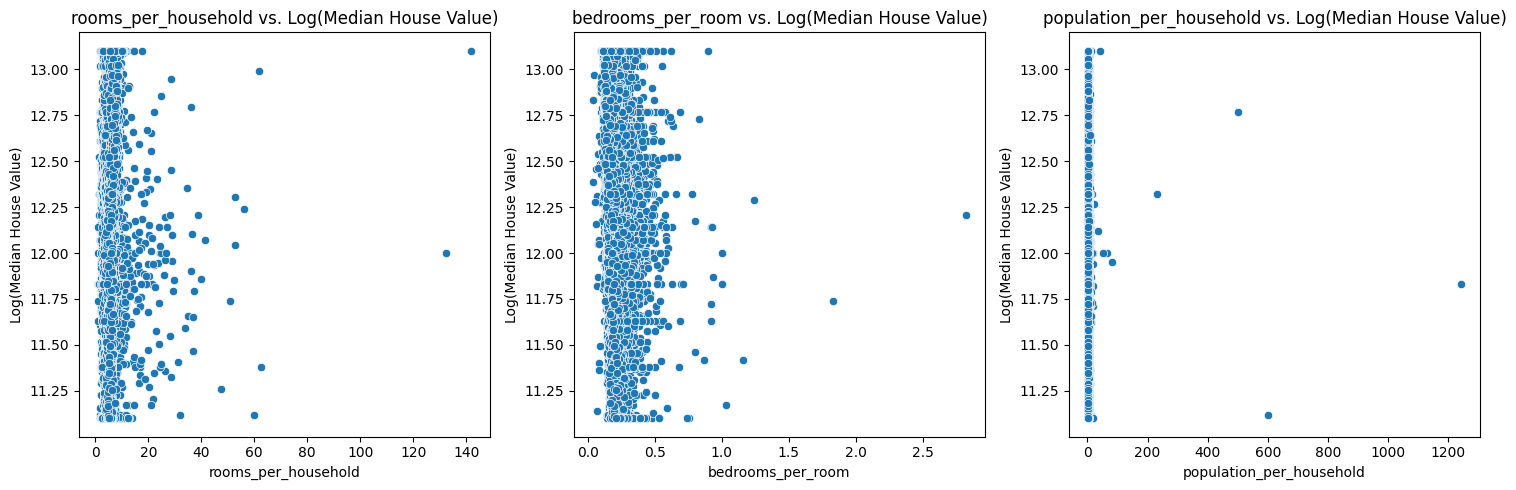

In [10]:
# Target variable distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df_engineered['median_house_value_log'], kde=True)
plt.title('Distribution of Log-Transformed Median House Value')
plt.xlabel('Log(Median House Value)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_engineered['median_house_value'], kde=True)
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Scatter plots of key features vs. target variable
key_features = ['median_income_log', 'rooms_per_household', 'housing_median_age', 'total_rooms', 'population']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='median_house_value_log', data=df_engineered)
    plt.title(f'{feature} vs. Log(Median House Value)')
    plt.xlabel(feature)
    plt.ylabel('Log(Median House Value)')

plt.tight_layout()
plt.show()

# Relationship between 'ocean_proximity' and target variable
plt.figure(figsize=(10, 6))
ocean_proximity_cols = [col for col in df_engineered.columns if 'ocean_proximity' in col]
df_melted = pd.melt(df_engineered, id_vars='median_house_value_log', value_vars=ocean_proximity_cols, var_name='ocean_proximity', value_name='value')
df_melted = df_melted[df_melted['value'] == True]
sns.boxplot(x='ocean_proximity', y='median_house_value_log', data=df_melted)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Log(Median House Value)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualizations for engineered features
engineered_features = ['rooms_per_household', 'bedrooms_per_room', 'population_per_household']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(engineered_features):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(x=feature, y='median_house_value_log', data=df_engineered)
    plt.title(f'{feature} vs. Log(Median House Value)')
    plt.xlabel(feature)
    plt.ylabel('Log(Median House Value)')

plt.tight_layout()
plt.show()

In [12]:
df_engineered.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,median_house_value_log,median_income_log,income_rooms_interaction,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,13.022766,2.232720,58.144254,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,12.789687,2.230165,51.785271,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,12.771673,2.111110,60.150315,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,12.740520,1.893579,32.827897,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,12.743154,1.578195,24.161264,False,False,False,True,False


<Axes: >

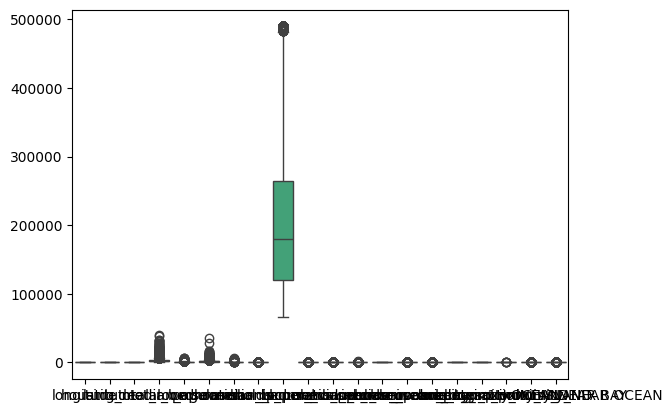

In [13]:
sns.boxplot(df_engineered)

# Data Splitting

Split the engineered data into training, validation, and testing sets.

In [14]:
from sklearn.model_selection import train_test_split

X = df_engineered.drop(['median_house_value', 'median_house_value_log'], axis=1)
y = df_engineered['median_house_value_log']

In [29]:
new_feature_names = [name.replace("<", "_").replace(">", "_").replace("[", "_").replace("]", "_") for name in X.columns]
X.columns = new_feature_names
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'median_income_log', 'income_rooms_interaction',
       'ocean_proximity__1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

Split the data into training and combined validation/testing sets, then further split the combined set into validation and testing sets.

In [30]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()
numerical_cols = [col for col in numerical_cols if 'ocean_proximity' not in col]
# Fit the scaler only on the training data and transform both training and validation/test data
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_val[numerical_cols] = scaler.transform(X_val[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Display the first few rows of the scaled training DataFrame to verify
display(X_train.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,median_income_log,income_rooms_interaction,ocean_proximity__1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
14196,1.272587,-1.372811,0.348490,0.222569,0.211228,0.768276,0.322906,-0.326196,-0.174916,-0.211785,0.051376,-0.193855,-0.356880,False,False,False,False,True
8267,0.709162,-0.876696,1.618118,0.340293,0.593094,-0.098901,0.672027,-0.035843,-0.402835,0.342185,-0.117362,0.145668,-0.317013,False,False,False,False,True
17445,-0.447603,-0.460146,-1.952710,-0.342597,-0.495226,-0.449818,-0.430461,0.144701,0.088216,-0.661658,-0.032280,0.337635,0.048162,False,False,False,False,True
14265,1.232698,-1.382172,0.586545,-0.561490,-0.409306,-0.007434,-0.380587,-1.017864,-0.600015,0.783032,0.077507,-1.222969,-0.845655,False,False,False,False,True
2271,-0.108551,0.532084,1.142008,-0.119565,-0.256559,-0.485877,-0.314962,-0.171488,0.349007,-0.550364,-0.068832,-0.007808,-0.019431,False,True,False,False,False


In [48]:
training_columns = X_train.columns.tolist()

<Axes: >

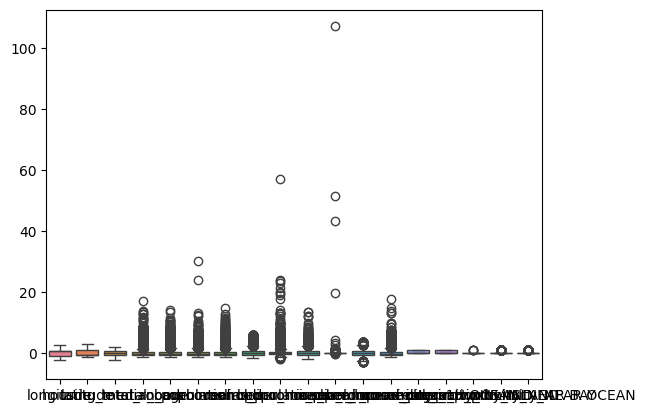

In [33]:
sns.boxplot(X_train)

# Model Training using XGBoost Regression

In [34]:
from xgboost import XGBRegressor

In [37]:
xgb_model =XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred=xgb_model.predict(X_test)

In [38]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
print(r2_score(y_test,y_pred)*100)
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

84.79360847319549
0.04487180766760102
0.14780894622673288


# Model Optimization
### GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,  # Use 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_val, y_val)

# Print the best hyperparameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score (neg_mean_squared_error):", grid_search.best_score_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred_val = best_xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_pred_val)
print(f"Mean Squared Error on Validation Set: {mse}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best Score (neg_mean_squared_error): -0.06587142070305985
Mean Squared Error on Validation Set: 0.008105560981036708


# Model Evaluation

Evaluate the best XGBoost model's performance on the test set.

Evaluate the best XGBoost model's performance on the test set by predicting on X_test, calculating RMSE, MAE, and R-squared, and creating a scatter plot.

RMSE: 0.23593023859548692
MAE: 0.1713337557197097
R-squared: 0.8113660684065758*100


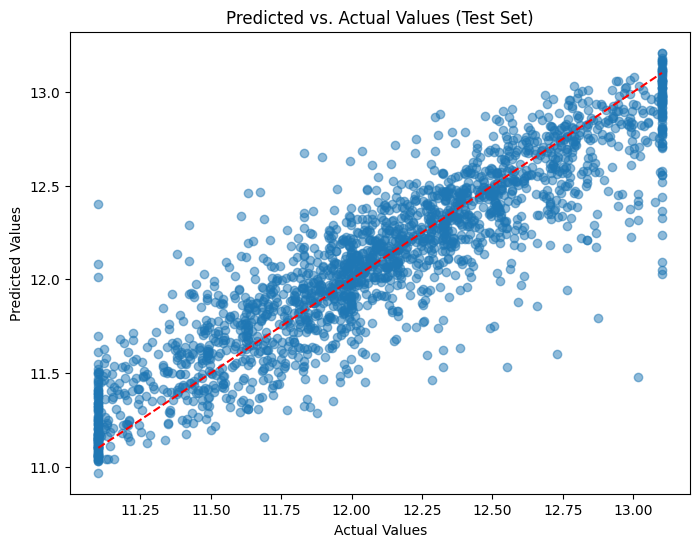

In [44]:
# Predict on the test set
y_pred = best_xgb_model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}*100")

# Create a scatter plot of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Perfect prediction line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Values (Test Set)")
plt.show()

# Learning Curve

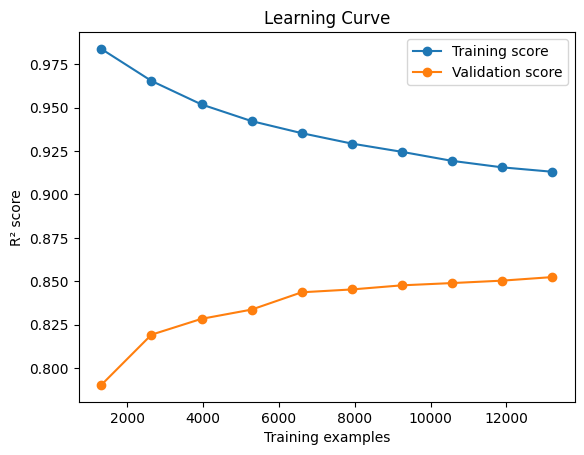

In [45]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_xgb_model, 
    X=X_train, 
    y=y_train,
    cv=5,
    scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score")
plt.plot(train_sizes, val_scores_mean, 'o-', label="Validation score")
plt.xlabel("Training examples")
plt.ylabel("R² score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()


# Validation Curve

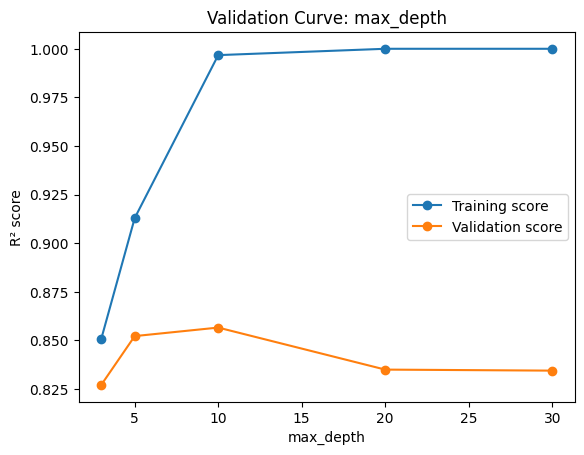

In [46]:
from sklearn.model_selection import validation_curve

param_range = [3, 5, 10, 20, 30]
train_scores, val_scores = validation_curve(
    best_xgb_model,
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    cv=5,
    scoring="r2"
)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

plt.plot(param_range, train_scores_mean, label="Training score", marker='o')
plt.plot(param_range, val_scores_mean, label="Validation score", marker='o')
plt.xlabel("max_depth")
plt.ylabel("R² score")
plt.title("Validation Curve: max_depth")
plt.legend(loc="best")
plt.show()


In [49]:
import pickle

with open('best_xgb_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('numerical_cols.pkl', 'wb') as f:
    pickle.dump(numerical_cols, f)

with open('ocean_proximity_cols.pkl', 'wb') as f:
    pickle.dump(ocean_proximity_cols, f)

with open('training_columns.pkl', 'wb') as f:
    pickle.dump(training_columns, f)